##### <img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Predictive analytics</center>
# Challenge S5: Modelos regresivos - Iteración y mejoras

## Objetivo

El objetivo de este challenge es usar nuestro dataframe de ventas en retail y hacer un modelo para la predicción de ventas para un artículo distinto del que vimos en el worksheet.

Tendréis que explorar los datos para ver el comportamiento del artículo elegido y las peculiaridades que pueda tener.

Luego tendréis que hacer un modelo que pueda predecir las ventas de este artículo usando todo lo aprendido anteriormente, probando distintos modelos, hiperparametrizándolos y por último añadiendo todas las variables sintéticas que veáis convenientes para que el modelo aprenda mejor del comportamiento de las unidades vendidas del producto.

## 1. Configuración del entorno

Cargamos los paquetes que vamos a utilizar en la sesión.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

random.seed(1234)
np.random.seed(seed=1234)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 2. Carga de los datos, filtrado de nuestro artículo y visualización de los datos
 



**Carga el dataframe**

In [2]:
df = pd.read_csv('Dataframe_Retail.csv')

**Usa una máscara para filtrar el artículo sobre el que queremos realizar las predicciones**

In [3]:
df['Referencia'].value_counts()

Baguetes 2 unidades                        862
Cerveza tercio                             862
Bolsa naranjas 2Kg.                        860
Tomate jugoso al peso                      859
Naranja en cajas                           858
Pack de plátanos                           858
Melo  OR                                   847
Jamón reserva                              829
Fresa premium 500gr                        812
Aceite de oliva virgen extra 5 l           797
Mandarina                                  650
MERLUZA PALANGRE 1 - 2 Kg (1 Caja 10Q.)    624
Sepia                                      617
Filetes de salmón                          615
Name: Referencia, dtype: int64

In [4]:
dataset = df[df['Referencia']=='Baguetes 2 unidades']
dataset.head()

,Fecha,Referencia,Unidades,Ventas
1,2017-01-01,Baguetes 2 unidades,34.0,33.320001
6,2017-01-02,Baguetes 2 unidades,3572.0,3257.839944
20,2017-01-03,Baguetes 2 unidades,3549.0,3239.219946
35,2017-01-04,Baguetes 2 unidades,3401.0,3104.419948
49,2017-01-05,Baguetes 2 unidades,3748.0,3419.119944


In [5]:
dataset = dataset.reset_index()
#dataset.drop('index', axis=1, inplace=True)
dataset['Fecha Format'] = pd.to_datetime(dataset['Fecha'], format='%Y-%m-%d')


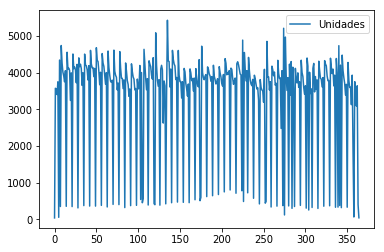

In [6]:
dataset[['Fecha','Unidades']][:365].plot()

## 3. Prueba de la predicción sobre nuestras unidades vendidas con distintos modelos

** Con la función de evaluación puedes probar el funcionamiento de distintos modelos**

In [7]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [8]:
def calculoEvaluacionModelo(modelo,df,norm):

    xPredicted = []
    yPredicted = []
    ySpotted = []
    mean_error = []

    for day in range(800,861):
        train = df[df['OffsetDays'] < day]
        val = df[df['OffsetDays'] == day]       
        
        xtr, xts = train.drop(['Unidades'], axis=1), val.drop(['Unidades'], axis=1)
        
        if(norm==True):
            sc = StandardScaler()  
            xtr = sc.fit_transform(xtr)  
            xts = sc.transform(xts)  
        ytr, yts = train['Unidades'].values, val['Unidades'].values  

        mdl = modelo
        mdl.fit(xtr, ytr)

        p = mdl.predict(xts)

        xPredicted=xPredicted + [day]
        yPredicted=yPredicted + [p[0]]
        ySpotted = ySpotted + [yts[0]]

        error = rmsle(yts, p)
        print('Month %d - Error %.5f' % (day, error))
        mean_error.append(error)

    print('Mean Error = %.5f' % np.mean(mean_error))
    prediction = pd.DataFrame(
        {'Sold units predicted': yPredicted,
         'Sold units actually spotted': ySpotted
        },index=xPredicted)
    prediction.plot()

In [9]:
dataset['OffsetDays'] = dataset['Fecha Format'] - dataset['Fecha Format'].iloc[0]
dataset['OffsetDays'] = dataset['OffsetDays'].dt.days

** Elige el modelo que más te haya gustado o mejor haya funcionado e hiperparametrizalo si quieres**

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 800 - Error 0.26282
Month 801 - Error 0.29640
Month 802 - Error 0.31143
Month 803 - Error 0.40959
Month 804 - Error 0.38754
Month 805 - Error 2.63381
Month 806 - Error 0.16222
Month 807 - Error 0.34500
Month 808 - Error 0.34369
Month 809 - Error 0.29641
Month 810 - Error 0.47483
Month 811 - Error 0.37009
Month 812 - Error 2.62956
Month 813 - Error 0.17100
Month 814 - Error 0.26828
Month 815 - Error 0.34807
Month 816 - Error 0.37251
Month 817 - Error 0.44080
Month 818 - Error 0.37908
Month 819 - Error 2.64198
Month 820 - Error 0.22298
Month 821 - Error 0.32269
Month 822 - Error 0.31126
Month 823 - Error 0.34930
Month 824 - Error 0.44978
Month 825 - Error 0.41556
Month 826 - Error 2.69789
Month 827 - Error 0.25188
Month 828 - Error 0.34562
Month 829 - Error 0.32189
Month 830 - Error 0.40992
Month 831 - Error 0.51375
Month 832 - Error 0.44790
Month 833 - Error 2.61640
Month 834 - Error 0.31204
Month 835 - Error 0.41346
Month 836 - Error 0.45178
Month 837 - Error 0.30690
Month 838 - 

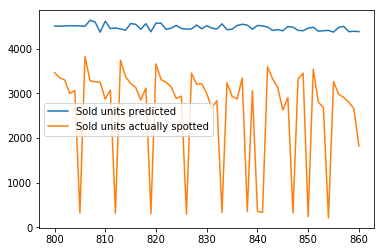

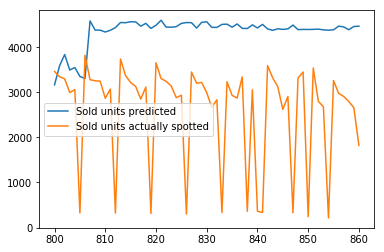

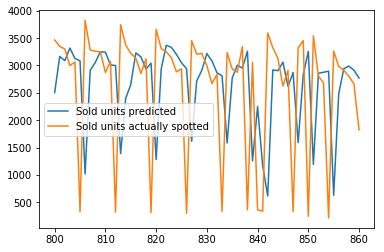

In [10]:
norma=False
dataset_simple = dataset[['OffsetDays','Unidades']].copy()
dataset_simple.head()
calculoEvaluacionModelo(MLPRegressor(),dataset_simple,norma)
calculoEvaluacionModelo(MLPRegressor(max_iter=10000),dataset_simple,norma)
calculoEvaluacionModelo(RandomForestRegressor(n_estimators=20, random_state=0),dataset_simple,norma)

## 4. Complementar el dataframe con variables sintéticas

** En base a lo que hayas observado en el comportamiento de las unidades vendidas de tu referencia crea variables sintéticas que creas que ayuden al modelo a mejorar la predicción**

In [15]:
dataset_copy =  dataset[['OffsetDays','Unidades','Ventas']].copy()
dataset_copy['Ventas_pev'] = dataset_copy['Ventas'].shift()
dataset_copy['Ventas_diff'] = dataset_copy['Ventas_pev'].diff()
dataset_copy.head()

,OffsetDays,Unidades,Ventas,Ventas_pev,Ventas_diff
0,0,34.0,33.320001,NaN,NaN
1,1,3572.0,3257.839944,33.320001,NaN
2,2,3549.0,3239.219946,3257.839944,3224.519943
3,3,3401.0,3104.419948,3239.219946,-18.619998
4,4,3748.0,3419.119944,3104.419948,-134.799997


In [17]:
dataset_copy = dataset_copy.dropna()

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 800 - Error 0.03282
Month 801 - Error 0.03209
Month 802 - Error 0.02812
Month 803 - Error 0.03084
Month 804 - Error 0.02772
Month 805 - Error 0.18308
Month 806 - Error 0.04489
Month 807 - Error 0.02742
Month 808 - Error 0.02740
Month 809 - Error 0.05159
Month 810 - Error 0.02983
Month 811 - Error 0.04582
Month 812 - Error 0.15321
Month 813 - Error 0.03146
Month 814 - Error 0.02379
Month 815 - Error 0.02943
Month 816 - Error 0.02979
Month 817 - Error 0.02330
Month 818 - Error 0.03101
Month 819 - Error 0.02490
Month 820 - Error 0.03698
Month 821 - Error 0.01676
Month 822 - Error 0.02670
Month 823 - Error 0.02613
Month 824 - Error 0.02694
Month 825 - Error 0.02348
Month 826 - Error 0.00733
Month 827 - Error 0.02201
Month 828 - Error 0.02200
Month 829 - Error 0.02310
Month 830 - Error 0.02386
Month 831 - Error 0.02061
Month 832 - Error 0.02750
Month 833 - Error 0.05273
Month 834 - Error 0.03158
Month 835 - Error 0.02454
Month 836 - Error 0.02060
Month 837 - Error 0.02461
Month 838 - 

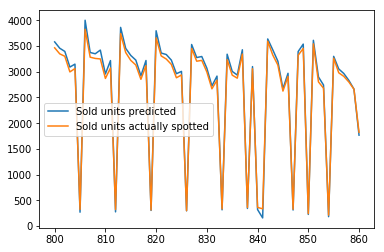

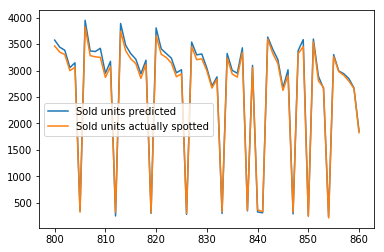

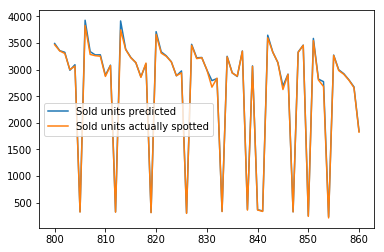

In [18]:
calculoEvaluacionModelo(MLPRegressor(),dataset_copy,norma)
calculoEvaluacionModelo(MLPRegressor(max_iter=10000),dataset_copy,norma)
calculoEvaluacionModelo(RandomForestRegressor(n_estimators=25, random_state=0),dataset_copy,norma)